In [1]:
import numpy as np
import matplotlib.pyplot as plt


## EX00
### Loading data

In [2]:
data_tensor = np.genfromtxt("0_and_1.csv", delimiter=",", skip_header=True)

image_labels = data_tensor[:, 0].astype("int")
image_pixels_tensor = data_tensor[:, 1:]

#reshape images from flatten vec to 28x28 matrix
image_pixels_tensor = image_pixels_tensor.reshape(-1, 28, 28)


In [3]:
print(f" Image resolution is {image_pixels_tensor[0].shape};\n Pixels in one image: {data_tensor[0].shape[0] - 1} pixels",)
print(f" Number of images in dataset: {len(image_pixels_tensor)}")
print(f" Set of labels: {np.unique(image_labels)}")

 Image resolution is (28, 28);
 Pixels in one image: 784 pixels
 Number of images in dataset: 8816
 Set of labels: [0 1]


## EX01

In [4]:
def display_img(n, image_labels, image_pixels_tensor):
    i = 0
    
    num_images = len(image_pixels_tensor)
    end_index = min(i + n, num_images)
    num_rows = (end_index - i + 3) // 4  # Calculate number of rows required

    fig, axes = plt.subplots(num_rows, 4, figsize=(12, 3*num_rows))

    for j in range(i, end_index):
        row = (j - i) // 4
        col = (j - i) % 4
        axes[row, col].imshow(image_pixels_tensor[j] / 255, cmap="gray")
        axes[row, col].set_title(f"Label for image: {int(image_labels[j])}", fontsize=14)
        axes[row, col].axis('off')

    # Hide any empty subplots
    for j in range(end_index - i, num_rows*4):
        row = j // 4
        col = j % 4
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

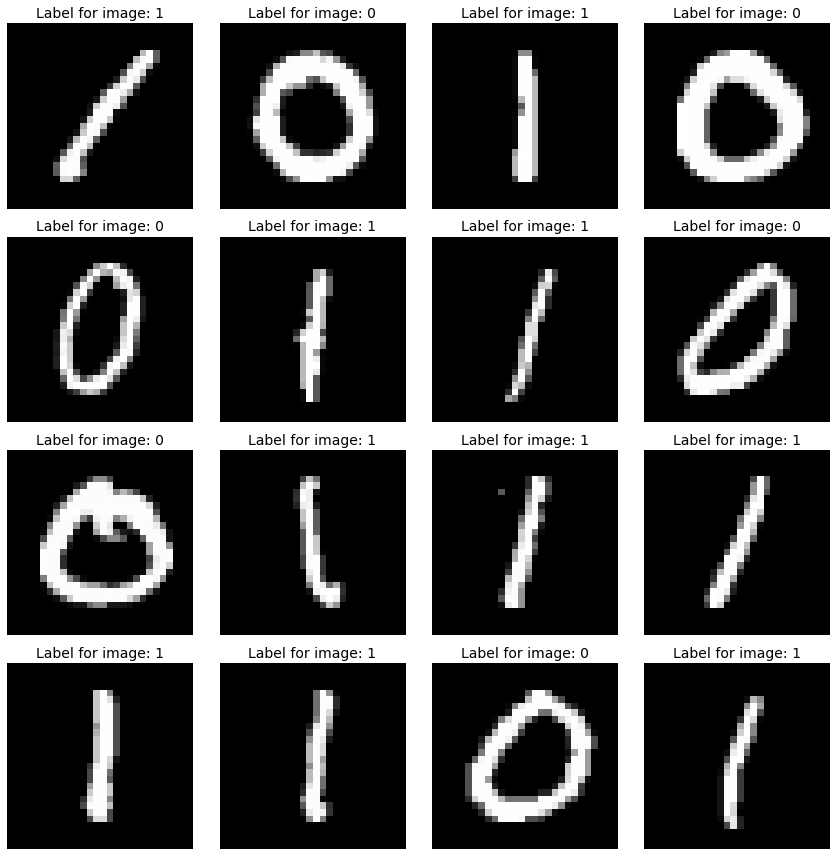

In [5]:
#Observing 
display_img(16, image_labels, image_pixels_tensor)

## Designing Neural Net architecture

## Utils


### Activation functions

In [6]:
def init_weights_matrix(n_input, n_out):
    return np.random.randn(n_input, n_out)



class Activation():
    def activate(self, Z):
        return Z
    def backward(self, Z):
        return np.ones_like(Z)


class ReLU(Activation):
    def activate(self, Z):
        return Z * (Z >= 0)

    def backward(self, Z):
        return 1 * (Z >= 0)


class Sigmoid(Activation):
    def activate(self, Z):
        return 1 / (1 + np.exp(-Z))

    def backward(self, Z):
        return self.activate(Z) * (1 - self.activate(Z))
    

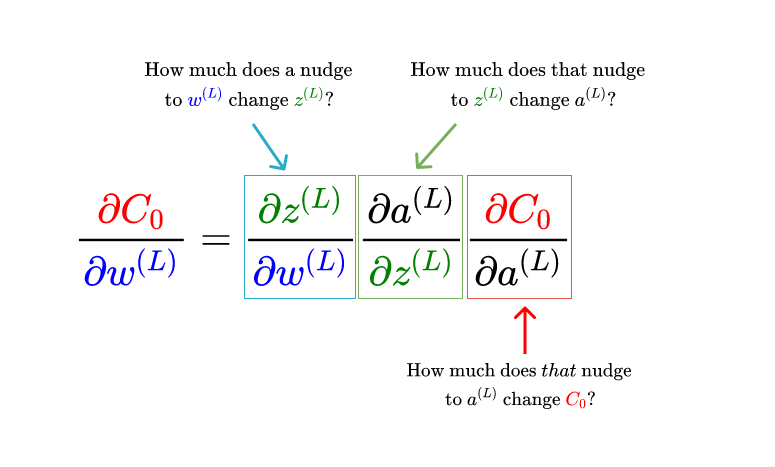

### Layer

In [10]:
class Layer():
    def __init__(self, n_in, n_out, activation):

        self.W = init_weights_matrix(n_in, n_out)
        self.b = np.random.randn(n_out, )

        
        self.activation = activation

        #Keep X_in as backup for backprop
        self.X_in = None
        
        #Gradient tensor
        self.dW = np.zeros_like(self.W)
        self.db = 0
        
    def forward(self, X_in):

        self.X_in = X_in
        
        Z = (X_in @ self.W) + self.b
        X_out = self.activation.activate(Z)
        return X_out

    def backward(self, dX_out):

        batch_size = len(self.X_in)

        self.dZ = self.X + b
        self.dA = None
            
        

layer = Layer(n_in=10, n_out=5, activation=Sigmoid())

layer.forward(np.random.randn(50, 10))


array([[8.67371850e-01, 2.84389995e-02, 5.76567448e-01, 6.68334327e-01,
        2.66204993e-02],
       [1.70472142e-02, 4.20870556e-03, 9.44544541e-01, 3.18004947e-01,
        6.58508659e-01],
       [9.41777453e-01, 9.99474675e-01, 5.48621928e-01, 2.93700101e-01,
        2.60019933e-01],
       [7.48210143e-02, 5.60090186e-01, 7.18405065e-01, 4.12275814e-01,
        1.45412632e-02],
       [1.90870744e-02, 6.55793847e-03, 9.74885688e-01, 7.98048149e-01,
        4.13484477e-02],
       [8.34877835e-02, 9.96028785e-01, 1.60914054e-01, 3.30479438e-02,
        3.59728136e-01],
       [9.82370971e-01, 9.97893121e-01, 8.36425841e-03, 9.84754562e-01,
        7.73071744e-03],
       [9.98254281e-01, 8.32717558e-01, 2.71992640e-01, 6.42154773e-01,
        1.18465337e-03],
       [9.61939790e-01, 5.50647859e-01, 4.68215548e-01, 2.95759357e-03,
        5.86996674e-01],
       [1.42381679e-01, 2.42298825e-02, 8.03788470e-01, 8.32207929e-01,
        9.62544251e-03],
       [8.63027451e-01, 5.8869